# Encodings

In this notebook, we are going to upload the [Kaggle competition](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) dataset on estimating property sales prices in Melbourne, Australia.

We will use the reduced dataset produced by [DanB](https://www.kaggle.com/dansbecker). We have uploaded a copy to a server at the National University of Córdoba to facilitate remote access.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [2]:
melb_df = pandas.read_csv('../data/melb_housing_df.csv')
melb_df[:3]

,housing_address,housing_room_count,housing_type,housing_price,housing_selling_method,housing_seller_agency,housing_date_sold,housing_cbd_distance,housing_bedroom_count,housing_bathroom_count,...,housing_building_area,housing_year_built,housing_lattitude,housing_longitude,suburb_id,housing_closest_neighborhood_overview,housing_room_segment,housing_bathroom_segment,housing_garage_segment,housing_date_sold_datetime
0,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,2.0,1.0,...,NaN,NaN,-37.7996,144.9984,0,Neighbourhood is quiet but super close to the ...,"(1, 2]","(0, 1]","(0, 1]",2016-03
1,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,2.0,1.0,...,79.0,1900.0,-37.8079,144.9934,0,"Abbotsford is a small, leafy, inner city subur...","(1, 2]","(0, 1]","(-1, 0]",2016-04
2,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3.0,2.0,...,150.0,1900.0,-37.8093,144.9944,0,One thing I often get is people don't realize ...,"(2, 3]","(1, 2]","(-1, 0]",2017-04


In [5]:
melb_df.columns

Index(['housing_address', 'housing_room_count', 'housing_type',
       'housing_price', 'housing_selling_method', 'housing_seller_agency',
       'housing_date_sold', 'housing_cbd_distance', 'housing_bedroom_count',
       'housing_bathroom_count', 'housing_garage_count', 'housing_land_size',
       'housing_building_area', 'housing_year_built', 'housing_lattitude',
       'housing_longitude', 'suburb_id',
       'housing_closest_neighborhood_overview', 'housing_room_segment',
       'housing_bathroom_segment', 'housing_garage_segment',
       'housing_date_sold_datetime'],
      dtype='object')

## Encoding non-numerical values

So far we have performed data analysis on different types of random variables. However, many methods used for *Machine Learning* can only be applied to numerical arrays.

Therefore, before starting any kind of modeling, we have to **encode** all the categorical information using only numerical information. When doing this process we have to take into account some properties that our encoded data will have, and how they will impact the models.

### One-hot encodings

The simplest way to do this encoding of categorical values ​​is to build a One-Hot encoding vector. It operates as follows:

1. The set $C$ of possible categories of the random variable is identified and the number of categories $N = |C|$
2. An integer is assigned to each category in the range $[0; N)$.
3. For each value $r_i$ of our data set with category $c_j$:

  1. A vector $x_i$ of 0s of size $N$ is constructed.
  2. The value 1 is assigned to the vector $x_i$ at the category position $c_j$.

We will start working with the scikit-learn library, which has most of the functions necessary to pre-process a data set and has tutorials that explain the different options. We recommend the [Encoding Categorical Features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) section.

We will use the *OneHotEncoder* class to do the encoding. All scikit-learn transformers follow the same two-stage interface: `fit` and `transform`.
* The `fit` method (train) is responsible for collecting all the information necessary to apply the encoding. In this case, implement steps 1 and 2 of the previous algorithm.
* The `transform` method is the one that actually builds the encodings for each row of the dataset.

In [3]:
melb_df[['housing_type']]

,housing_type
0,h
1,h
2,h
3,h
4,h
...,...
13201,h
13202,h
13203,h
13204,h


In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(melb_df[['housing_type', 'housing_selling_method']])
# We can inspect the categories found by the encoder
encoder.categories_

[array(['h', 't', 'u'], dtype=object),
 array(['PI', 'S', 'SA', 'SP', 'VB'], dtype=object)]

In [8]:
encoded_types = encoder.transform(melb_df[['housing_type', 'housing_selling_method']])
encoded_types[:10]

array([[1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0.]])

In [9]:
encoded_types[:10].shape

(10, 8)

This transformation is so common that Scikit-lean implements the `DictVectorizer` transformer which automatically encodes all categorical columns and combines them with the existing numeric data.

In order to use it, we will need to convert the dataset into a list of dictionaries.

In [10]:
feature_cols = ['housing_type', 'housing_selling_method', 'housing_room_count', 'housing_bedroom_count']
feature_dict = list(melb_df[feature_cols].T.to_dict().values())
feature_dict[:2]

[{'housing_type': 'h',
  'housing_selling_method': 'S',
  'housing_room_count': 2,
  'housing_bedroom_count': 2.0},
 {'housing_type': 'h',
  'housing_selling_method': 'S',
  'housing_room_count': 2,
  'housing_bedroom_count': 2.0}]

In [11]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [12]:
feature_matrix.todense()

matrix([[2., 2., 0., ..., 1., 0., 0.],
        [2., 2., 0., ..., 1., 0., 0.],
        [3., 3., 0., ..., 1., 0., 0.],
        ...,
        [3., 3., 0., ..., 1., 0., 0.],
        [4., 4., 1., ..., 1., 0., 0.],
        [4., 4., 0., ..., 1., 0., 0.]])

In [13]:
vec.get_feature_names_out()[:10]

array(['housing_bedroom_count', 'housing_room_count',
       'housing_selling_method=PI', 'housing_selling_method=S',
       'housing_selling_method=SA', 'housing_selling_method=SP',
       'housing_selling_method=VB', 'housing_type=h', 'housing_type=t',
       'housing_type=u'], dtype=object)

## sparse arrays

One-hot encodings have the property of increasing the amount of memory required to store a variable **quadratically** with respect to the number of categories. However, most elements of the new representation will be null. The number of non-zero elements in the matrix grows **linearly** with respect to the number of categories to represent.

That is why there are *sparse arrays*, which store only the non-null values of an array in different data structures.

Encoding methods like `DictVectorizer` or `OneHotEncoding` usually return sparse arrays if it is more efficient in terms of computational resources.

![picture](https://matteding.github.io/images/coo.gif)

There are [different types of sparse matrices](https://docs.scipy.org/doc/scipy/reference/sparse.html) and the operations on each of them are different; and different from dense matrices.

In [14]:
# Fill nan values on sparse matrix.
if numpy.any(numpy.isnan(feature_matrix.data)):
  feature_matrix.data = numpy.nan_to_num(feature_matrix.data)

To apply some transformations or models it is necessary to convert the sparse matrices to dense ones. Before making this change, it is recommended to calculate the size of the final array. Remember that each floating point number occupies 4 bytes for single precision (numpy.float32) and 8 bytes for double precision (numpy.float64).

In [16]:
# Before doing this type of conversion, it's mandatory to calculate the
# size of the resulting matrix!
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 10
precision_type = numpy.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
    dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
    # We calculate how many rows would fit given the number of columns
    n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
    print("Matrix too big! Using only first {} of {} rows".format(
        n_rows, feature_matrix.shape[0]))
    dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 0.50 MB
Final size: 0.50


In [18]:
# Remember to cut your original data as well.
if dense_feature_matrix.shape[0] < len(melb_df):
    melb_df_sample = melb_df.iloc[:dense_feature_matrix.shape[0]]
else:
    melb_df_sample = melb_df

## Exploring free text

Unstructured data, such as free text or images, have specific methods to be able to analyze them. In this notebook we will try to understand what kind of information neighborhood descriptions give us, and if it can be useful in our price prediction task.

It is useful to know how much text we have per instance, to start estimating the amount of information represented and some characteristics of the documents. For example: it is not the same to analyze Tweets as it is to analyze Wikipedia documents.

/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of number of characters for neighborhood reviews')

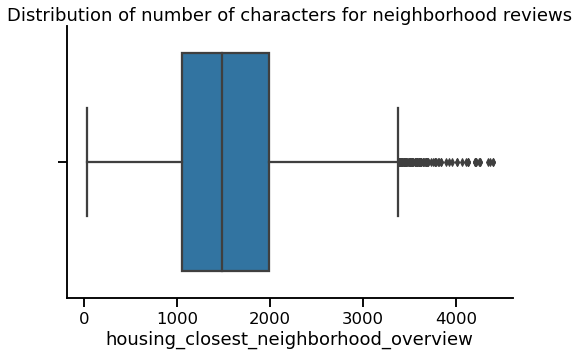

In [19]:
plt.figure(figsize=(8, 5))
seaborn.boxplot(melb_df.housing_closest_neighborhood_overview.apply(len))
seaborn.despine()
plt.title("Distribution of number of characters for neighborhood reviews")

## StandardScaler

`Sklearn` has a set of implemented classes called `transformers`. Transformers are embeddings (projections) that from receive an input matrix $N \times M$ and projects this matrix to a new space $N \times D$. D can less (dimensional reduction), equal (preprocessing/scaling), or higher than M (encodings).

`StandardScaler` is a transformer that for a set of input columns, standardize them by removing the mean and dividing by their standard deviation.

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

scaler = StandardScaler()
scaler.fit(melb_df[["housing_price"]])

StandardScaler()

In [55]:
melb_df["housing_price_scaled"] = scaler.transform(melb_df[["housing_price"]])

In [56]:
melb_df[["housing_price", "housing_price_scaled"]]

,housing_price,housing_price_scaled
0,1480000.0,0.951425
1,1035000.0,0.050450
2,1465000.0,0.921055
3,850000.0,-0.324113
4,1600000.0,1.194385
...,...,...
13201,1245000.0,0.475629
13202,1031000.0,0.042351
13203,1170000.0,0.323779
13204,2500000.0,3.016583


In [58]:
melb_df["housing_price_scaled"].mean(axis=0), melb_df["housing_price_scaled"].std(axis=0)

(-6.432164441471357e-17, 1.000037863728452)

## Ordinal Encoding

`OrdinalEncoding` receives an ordinal categorical random variable with `N` categories and enumerate them with integers from $0, ... , N-1$.

If the random variable has no order it's better to use `OneHotEncoding`. As a demonstration, we are going to use this method with `SellerG` provided that this variable is not ordinal.

In [59]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit(melb_df[["housing_seller_agency"]])

OrdinalEncoder()

After fitting, you can access the number the enumerated categories.

In [60]:
oe.categories_

[array(['68', '@Realty', 'ASL', "Abercromby's", 'Ace', 'Alexkarbon',
        'Allens', 'Anderson', 'Appleby', 'Aquire', 'Area', 'Ascend', 'Ash',
        'Asset', 'Assisi', 'Australian', 'Barlow', 'Barry', 'Bayside',
        'Bekdon', 'Beller', 'Bells', 'Besser', 'Better', 'Biggin', 'Blue',
        'Boutique', 'Bowman', 'Brace', 'Brad', 'Buckingham', 'Bullen',
        'Burnham', 'Buxton', 'Buxton/Advantage', 'Buxton/Find', 'C21',
        'CASTRAN', 'Caine', 'Calder', 'Carter', 'Castran', 'Cayzer',
        'Century', 'Chambers', 'Changing', 'Charlton', 'Chisholm',
        'Christopher', 'Clairmont', 'Collins', 'Community', 'Compton',
        'Conquest', 'Considine', 'Coventry', 'Craig', 'Crane', "D'Aprano",
        'Daniel', 'Darren', 'David', 'Del', 'Dingle', 'Direct', 'Dixon',
        'Domain', 'Douglas', 'Edward', 'Elite', 'Eview', 'FN', 'First',
        'Fletchers', 'Fletchers/One', 'Follett', 'Frank', 'Free', 'GL',
        'Galldon', 'Gardiner', 'Garvey', 'Gary', 'Geoff', 'Grantham'

In [61]:
melb_df["housing_seller_agency_enc"] = oe.transform(melb_df[["housing_seller_agency"]])

In [62]:
melb_df["housing_seller_agency_enc"].value_counts()

154.0    1554
106.0    1240
258.0    1152
17.0     1011
195.0     699
         ... 
49.0        1
128.0       1
185.0       1
35.0        1
179.0       1
Name: housing_seller_agency_enc, Length: 266, dtype: int64

You can also obtain the categories given the enumeration with `inverse_transform`.

In [64]:
oe.inverse_transform(melb_df[["housing_seller_agency_enc"]])

array([['Biggin'],
       ['Biggin'],
       ['Biggin'],
       ...,
       ['Raine'],
       ['Sweeney'],
       ['Village']], dtype=object)

## Discretizers

Discretization provides a way to partition continuous features into discrete values. Discretized features can make a model more expressive, while maintaining interpretability.

Sklearn implementation is through the class `KBinsDiscretizer` where the output is one-hot encoded into a sparse matrix.

In [65]:
from sklearn.preprocessing import KBinsDiscretizer

Let's suppose that we want to discretize the columns `Price` and `Rooms`. The first column we want to create 3 segments and for the second one only 2 segments. To do so, we make an instance of the class `KBinsDiscretizer` with the parameter `n_bins`. `n_bins` takes a list of integers where each element represents the number of segments. In this case `n_bins=[3, 2]`. Then, attribute `encode='ordinal'` tells the discretizer to enumerate each segment with an identifier.

In [67]:
kbe = KBinsDiscretizer(n_bins=[3, 2], encode='ordinal')

In [68]:
kbe.fit(melb_df[["housing_price", "housing_room_count"]])

KBinsDiscretizer(encode='ordinal', n_bins=[3, 2])

kbe.fit(melb_df[["Price", "Rooms"]])
The new segments are:

`Price`: `[85000, 730000), [730000, 1180000), [1180000, 9000000)`

`Rooms`: `[1, 3), [3, 10)`

Then, each segment is enumerated with an identifier.

`Price`: `[85000, 730000) -> 0, [730000, 1180000) -> 1, [1180000, 9000000) -> 2`

`Rooms`: `[1, 3) -> 0, [3, 10) -> 1`

Finally, we use the identifiers as the encoding.


In [69]:
kbe.bin_edges_

array([array([  85000.,  720000., 1135000., 2670000.]),
       array([ 1.,  3., 10.])], dtype=object)

In [70]:
melb_df[["housing_price_discretized", "housing_room_count_discretized"]] = kbe.transform(melb_df[["housing_price", "housing_room_count"]])

In [71]:
melb_df[["housing_price_discretized", "housing_room_count_discretized"]]

,housing_price_discretized,housing_room_count_discretized
0,2.0,0.0
1,1.0,0.0
2,2.0,1.0
3,1.0,1.0
4,2.0,1.0
...,...,...
13201,2.0,1.0
13202,1.0,1.0
13203,2.0,1.0
13204,2.0,1.0


## Polynomial Features

In [72]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
poly.fit(melb_df[["housing_price", "housing_cbd_distance"]])

PolynomialFeatures(degree=4)

In [73]:
poly_features = poly.transform(melb_df[["housing_price", "housing_cbd_distance"]])

In [74]:
poly_features.shape

(13206, 15)

## Pipelines

In [75]:
melb_df["label"] = (melb_df["housing_price"] > 1000000).replace({True: 1, False: 0})

In [76]:
melb_df["label"].value_counts()

0    7837
1    5369
Name: label, dtype: int64

In [77]:
melb_df.columns

Index(['housing_address', 'housing_room_count', 'housing_type',
       'housing_price', 'housing_selling_method', 'housing_seller_agency',
       'housing_date_sold', 'housing_cbd_distance', 'housing_bedroom_count',
       'housing_bathroom_count', 'housing_garage_count', 'housing_land_size',
       'housing_building_area', 'housing_year_built', 'housing_lattitude',
       'housing_longitude', 'suburb_id',
       'housing_closest_neighborhood_overview', 'housing_room_segment',
       'housing_bathroom_segment', 'housing_garage_segment',
       'housing_date_sold_datetime', 'housing_price_scaled',
       'housing_seller_agency_enc', 'housing_price_discretized',
       'housing_room_count_discretized', 'label'],
      dtype='object')

In [78]:
X, y = melb_df[["housing_room_count", "housing_type", "housing_selling_method", "housing_cbd_distance"]], melb_df["label"]

In [79]:
X

,housing_room_count,housing_type,housing_selling_method,housing_cbd_distance
0,2,h,S,2.5
1,2,h,S,2.5
2,3,h,SP,2.5
3,3,h,PI,2.5
4,4,h,VB,2.5
...,...,...,...,...
13201,4,h,S,16.7
13202,3,h,SP,6.8
13203,3,h,S,6.8
13204,4,h,PI,6.8


In [80]:
y

0        1
1        1
2        1
3        0
4        1
        ..
13201    1
13202    1
13203    1
13204    1
13205    1
Name: label, Length: 13206, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

col_transformer = ColumnTransformer([
    ("categ", OneHotEncoder(), ["housing_type", "housing_selling_method"]),
    ("scale", StandardScaler(), ["housing_room_count", "housing_cbd_distance"]),
    ("poly", PolynomialFeatures(2), ["housing_room_count", "housing_cbd_distance"])
])

col_transformer.fit(X_train)

ColumnTransformer(transformers=[('categ', OneHotEncoder(),
                                 ['housing_type', 'housing_selling_method']),
                                ('scale', StandardScaler(),
                                 ['housing_room_count',
                                  'housing_cbd_distance']),
                                ('poly', PolynomialFeatures(),
                                 ['housing_room_count',
                                  'housing_cbd_distance'])])

In [83]:
X_train

,housing_room_count,housing_type,housing_selling_method,housing_cbd_distance
9251,2,u,S,7.5
10300,3,h,S,12.1
12415,2,h,PI,7.3
3043,2,u,PI,4.6
4589,2,h,PI,3.8
...,...,...,...,...
13123,2,u,S,6.2
3264,4,h,S,7.9
9845,3,t,S,13.8
10799,4,h,S,31.7


In [84]:
col_transformer.transform(X_train)


array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 4.00000e+00,
        1.50000e+01, 5.62500e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.00000e+00,
        3.63000e+01, 1.46410e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 4.00000e+00,
        1.46000e+01, 5.32900e+01],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 9.00000e+00,
        4.14000e+01, 1.90440e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.60000e+01,
        1.26800e+02, 1.00489e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.60000e+01,
        3.68000e+01, 8.46400e+01]])

In [86]:
from sklearn.base import BaseEstimator
import pandas as pd
from random import random

class RandomClassifier(BaseEstimator):
    def fit(self, X, y):
        # Your code for fitting
        return self

    def predict(self, X):
        y_pred = [random() > 0.5 for _ in range(len(X))]
        y_pred = pd.Series(y_pred)
        return y_pred.astype(int)

In [87]:
random_clf = RandomClassifier()

In [88]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("preprocessor", col_transformer),
    ("pca", PCA(n_components=3)),
    ("classifier", LogisticRegression()),
    #("classifier", RandomClassifier())
])
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categ', OneHotEncoder(),
                                                  ['housing_type',
                                                   'housing_selling_method']),
                                                 ('scale', StandardScaler(),
                                                  ['housing_room_count',
                                                   'housing_cbd_distance']),
                                                 ('poly', PolynomialFeatures(),
                                                  ['housing_room_count',
                                                   'housing_cbd_distance'])])),
                ('pca', PCA(n_components=3)),
                ('classifier', LogisticRegression())])

In [89]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categ', OneHotEncoder(),
                                                  ['housing_type',
                                                   'housing_selling_method']),
                                                 ('scale', StandardScaler(),
                                                  ['housing_room_count',
                                                   'housing_cbd_distance']),
                                                 ('poly', PolynomialFeatures(),
                                                  ['housing_room_count',
                                                   'housing_cbd_distance'])])),
                ('pca', PCA(n_components=3)),
                ('classifier', LogisticRegression())])

In [90]:
y_pred = pipe.predict(X_test)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1558
           1       0.73      0.56      0.63      1084

    accuracy                           0.73      2642
   macro avg       0.73      0.71      0.71      2642
weighted avg       0.73      0.73      0.73      2642



## GridSearchCV and Pipelines

In [92]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "classifier__C": [1, 0.1],
    "classifier__penalty": ["l1", "l2"],
    "pca__n_components": [4, 5, 6]
}

grid = GridSearchCV(estimator=pipe, param_grid=parameters)

In [93]:
X_train.isna().sum()

housing_room_count        0
housing_type              0
housing_selling_method    0
housing_cbd_distance      0
dtype: int64

In [94]:
grid.fit(X_train, y_train)

/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----------------------------------------------------------

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categ',
                                                                         OneHotEncoder(),
                                                                         ['housing_type',
                                                                          'housing_selling_method']),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['housing_room_count',
                                                                          'housing_cbd_distance']),
                                                                        ('poly',
                                                                         PolynomialFeatures(),
                                   

In [95]:
y_test = grid.best_estimator_.predict(X_test)

In [96]:
grid.best_params_

{'classifier__C': 0.1, 'classifier__penalty': 'l2', 'pca__n_components': 6}

In [97]:
grid.best_estimator_[0:2].transform(X_test)

array([[-2.09897778e+01,  3.08432236e+00, -1.67450626e+00,
        -2.56415076e-01, -5.52094644e-01, -4.87408614e-02],
       [-1.32937215e+01, -8.88825198e+00, -2.73579212e+00,
        -1.19335560e+00,  2.82206569e-01, -9.98770684e-01],
       [-6.06407805e+01,  1.33938022e+00, -4.38302947e-01,
        -3.39008723e-02,  1.77586794e-01, -7.70924715e-01],
       ...,
       [-9.68888440e+00,  3.00749123e+01,  4.80499518e+00,
        -6.19959357e-01, -1.50273463e-03,  5.93498922e-01],
       [-7.90580765e+01,  4.10239258e-02,  3.49587650e-01,
         7.48677143e-02, -6.24754256e-01, -7.44208386e-02],
       [-2.20111239e+01,  1.55484334e+01,  1.05179159e+00,
        -1.76479784e-01, -3.56204864e-01,  1.94872592e-01]])

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1587
           1       0.88      0.71      0.79      1055

    accuracy                           0.85      2642
   macro avg       0.86      0.82      0.83      2642
weighted avg       0.85      0.85      0.84      2642

